# Predictive Modeling of Low Birth Weight for Newborn Babies

The purpose of this analysis is to perform predictive modeling on the low birth weight dataset to find the best predictors of lower birth weight for newborn babies. Let's get started!

<a id="Low Body Weight Data"></a>
## Low Body Weight Data
Dataset Source: Hosmer, D.W., Lemeshow, S. and Sturdivant, R.X. (2013)
Applied Logistic Regression, 3rd ed., New York: Wiley

This dataset is also part of the aplore3 R package.

 <table style="font-size: 16px; text-align: left;" width=100%>
  <tr>
  <td width=5% style="text-align: center; font-size: 16px">
   </td>
   <td width=11% style="text-align: left; font-size: 16px">
   <b>Variable</b>
   </td>
   <td width=53% style="text-align: left; font-size: 16px">
   <b> Description</b>
   </td>
    <td width=31% rowspan=7>

   <img src='https://images.ctfassets.net/6m9bd13t776q/2NI4Elw3oJ51hii4LJErKN/9a1542d1e5d3410663054ea352b75967/average_baby_weight_in_first_year-hero-shutterstock_1505219726.webp?q=75&w=660'></img>
  
  </td>
  </tr>
  <tr>
   <td width=5% style="text-align: center; font-size: 16px">
     0
   </td>
   <td width=11% style="text-align: left; font-size: 16px">
     LOW
   </td>
   <td width=53% style="text-align: left; font-size: 16px">
     Low birth weight (0: >= 2500g, 1: < 2500 g) -  target variable
   </td>
  
 </tr>
 <tr>
   <td style="text-align: center; font-size: 16px">
    1
  </td>
  <td style="text-align: left; font-size: 16px">
   AGE
  </td>
  <td style="text-align: left; font-size: 16px">
   Mother’s age in years
  </td>
 </tr>
 <tr>
  <td style="text-align: center; font-size: 16px">
   2
  </td>
  <td style="text-align: left; font-size: 16px">
  RACE
  </td>
  <td  style="text-align: left; font-size: 16px">
  Race (1: White, 2: Black, 3: Other)
  </td>
 </tr>
 <tr>
  <td style="text-align: center; font-size: 16px">
  3
  </td>
  <td style="text-align: left; font-size: 16px">
  SMOKE
  </td>
  <td style="text-align: left; font-size: 16px">
  Smoking status during pregnancy (1: No, 2: Yes)
  </td>
 </tr>
 <tr>
  <td style="text-align: center; font-size: 16px">
  4
  </td>
  <td style="text-align: left; font-size: 16px">
  PTL
  </td>
  <td style="text-align: left; font-size: 16px">
  History of premature labor (1: None, 2: One, 3: Two, etc)
  </td>
 </tr>
 <tr>
  <td style="text-align: center; font-size: 16px">
   5
  </td>
  <td style="text-align: left; font-size: 16px">
  HT
  </td>
  <td style="text-align: left; font-size: 16px">
  History of hypertension (1: No, 2: Yes)
  </td>
 </tr>
   <td style="text-align: center; font-size: 16px">
   6
  </td>
  <td style="text-align: left; font-size: 16px">
  UI
  </td>
  <td style="text-align: left; font-size: 16px">
  Presence of Uterine irritability (1: No, 2: Yes)
  </td>
 </tr>
   <td style="text-align: center; font-size: 16px">
   7
  </td>
  <td style="text-align: left; font-size: 16px">
  FTV
  </td>
  <td style="text-align: left; font-size: 16px">
  Physician visit count during the first trimester (1:None, 2:One, 3:Two, etc)
  </td>
 </tr>
</table>

## Table of Contents
- [Load Libraries](#load_libraries)
- [Access Data](#access_data)
- [Explore Data](#explore_data)
- [Split Data into Training and Test Set](#training_test)
- [Build Logistic Regression Model](#build_model)
- [Logistic Regression Predictions for Test Data](#test_data)
- [Evaluate Logistic Regression Model](#evaluate_model)
- [Build Naive Bayes Model](#build_model_2)
- [Naive Bayes Predictions for Test Data](#test_data_2)
- [Evaluate Naive Bayes Model](#evaluate_model_2)
- [Build Decision Tree Model](#build_model_3)
- [Decision Tree Predictions for Test Data](#test_data_3)
- [Evaluate Decision Tree Model](#evaluate_model_3)

<a id="load_libraries"></a>
## Load Libraries

The Spark and Python libraries that you need are preinstalled in the notebook environment and only need to be loaded.

Run the following cell to load the libraries you will work with in this notebook:

In [1]:
# PySpark Machine Learning Library
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression, NaiveBayes, MultilayerPerceptronClassifier, DecisionTreeClassifier
from pyspark.ml.feature import HashingTF, Tokenizer, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql import Row, SQLContext

import os
import sys
from pyspark import SparkConf
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *

from pyspark.mllib.classification import LogisticRegressionWithSGD
from pyspark.mllib.regression import LabeledPoint
from numpy import array

from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# Library for confusion matrix, precision, test error
from pyspark.mllib.evaluation import MulticlassMetrics
# Library For Area under ROC curve and Area under precision-recall curve
from pyspark.mllib.evaluation import BinaryClassificationMetrics

# Assign resources to the application
sqlContext = SQLContext(sc)

# packages for data analysis
import numpy as np
import pandas as pd

/opt/ibm/spark/python/lib/pyspark.zip/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.


In [2]:
# The data will be loaded into an array.
# This is the summary of the data structure, including the column position and name.
# The first filed starts from position 0.

# 0 ID      -  Identification code
# 1 LOW     -  Low birth weight (0: >= 2500 g, 1: < 2500 g), target variable
# 2 AGE     -  Mother's age in years
# 3 RACE    -  Race (1: White, 2: Black, 3: Other)
# 4 SMOKE   -  Smoking status during pregnancy (1: No, 2: Yes)
# 5 PTL     -  History of premature labor (1: None, 2: One, 3: Two, etc)
# 6 HT      -  History of hypertension (1: No, 2: Yes)
# 7 UI      -  Presence of Uterine irritability (1: No, 2: Yes)
# 8 FTV     -  Number of physician visits during the first trimester (1: None, 2: One, 3: Two, etc)

# Label is a target variable. PersonInfo is a list of independent variables besides unique identifier

LabeledDocument = Row("ID", "PersonInfo", "label")

# Define a function that parses the raw CSV file and returns an object of type LabeledDocument
# All variables are important except the ID code. This will be dropped

def parseDocument(line):
    values = [str(x) for x in line.split(',')]
    if (values[1]>'0'):
      LOW = 1.0
    else:
      LOW = 0.0

    textValue = str(values[2]) + " " + str(values[3])+ " " + str(values[4])+ " " + str(values[5])+ " " + str(values[6])+ " " + str(values[7])+ " " + str(values[8])
    return LabeledDocument(values[0], textValue, LOW)

<a id="access_data"></a>
## Access Data
To read a file from Object Storage, you must setup the Spark configuration with your Object Storage credentials.

To do this, click on the cell below and select the **Insert to code > Insert Spark Session DataFrame** function from the Files tab below the data file you want to work with.

<div class="alert alert-block alert-info">The following code contains the credentials for a file in your IBM Cloud Object Storage. </div>

In [3]:

import ibmos2spark

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

metadata = {
    'endpoint': 'https://s3.private.us-south.cloud-object-storage.appdomain.cloud',
    'service_id': 'iam-ServiceId-03d8a548-4ab7-49b7-a838-aeb6c3361d37',
    'iam_service_endpoint': 'https://iam.cloud.ibm.com/oidc/token',
    'api_key': 'fRvFmMME4TqenKiyVGLqhx2OaFDTqYkisC5zdCmh8WHD'
}

configuration_name = 'os_9047c094582b469abafd61f4a5efe4b4_configs'
cos = ibmos2spark.CloudObjectStorage(sc, metadata, configuration_name, 'bluemix_cos')
url = cos.url('lowbwt.csv', 'apachesparktutorial-donotdelete-pr-pcnqnxgnxjduaw')

df_data_1 = spark.read \
    .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat') \
    .option('header', 'true') \
    .option('inferSchema', 'true')\
    .load(url)
df_data_1.show(10)



+---+---+---+----+-----+---+---+---+---+
| ID|LOW|AGE|RACE|SMOKE|PTL| HT| UI|FTV|
+---+---+---+----+-----+---+---+---+---+
| 85|  0| 19|   2|    0|  0|  0|  1|  0|
| 86|  0| 33|   3|    0|  0|  0|  0|  3|
| 87|  0| 20|   1|    1|  0|  0|  0|  1|
| 88|  0| 21|   1|    1|  0|  0|  1|  2|
| 89|  0| 18|   1|    1|  0|  0|  1|  0|
| 91|  0| 21|   3|    0|  0|  0|  0|  0|
| 92|  0| 22|   1|    0|  0|  0|  0|  1|
| 93|  0| 17|   3|    0|  0|  0|  0|  1|
| 94|  0| 29|   1|    1|  0|  0|  0|  1|
| 95|  0| 26|   1|    1|  0|  0|  0|  0|
+---+---+---+----+-----+---+---+---+---+
only showing top 10 rows



<a id="Explore_data"></a>
## Explore Data

In [4]:
print('Number of Babies', df_data_1.count())

Number of Babies 189


In [5]:
#Number of Babies with low body weight and not
df_data_1.groupby('LOW').count().show()

+---+-----+
|LOW|count|
+---+-----+
|  1|   59|
|  0|  130|
+---+-----+



In [6]:
#Descriptive stast for all variables
df_data_1.toPandas().describe()

,ID,LOW,AGE,RACE,SMOKE,PTL,HT,UI,FTV
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,121.079365,0.312169,23.238095,1.846561,0.391534,0.195767,0.063492,0.148148,0.793651
std,63.303634,0.464609,5.298678,0.918342,0.489390,0.493342,0.244494,0.356190,1.059286
min,4.000000,0.000000,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,68.000000,0.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,123.000000,0.000000,23.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,176.000000,1.000000,26.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,226.000000,1.000000,45.000000,3.000000,1.000000,3.000000,1.000000,1.000000,6.000000


+--------+---+---+
|RACE_LOW|  0|  1|
+--------+---+---+
|       3| 42| 25|
|       1| 73| 23|
|       2| 15| 11|
+--------+---+---+



<Axes: title={'center': 'Low Body Weight by Race'}, xlabel='RACE_LOW'>

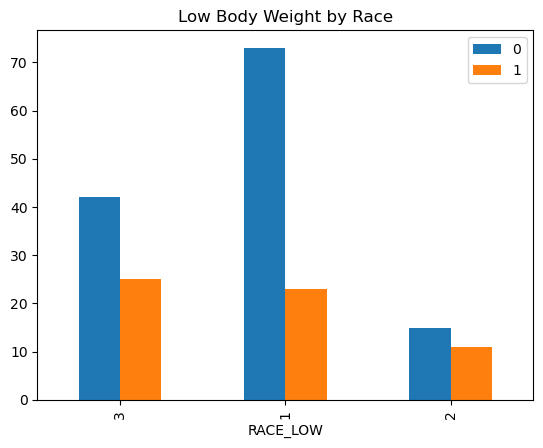

In [7]:
#Number of babies with low and normal body weight by race
import matplotlib.pyplot as plt
%matplotlib inline
df_data_1.crosstab('RACE', 'LOW').show()
df=df_data_1.crosstab('RACE', 'LOW').toPandas()
df.plot.bar(x="RACE_LOW", legend=True , title="Low Body Weight by Race")

In [8]:
# Average age by weight outcome
# Convert Age data type from string to numeric.
pdf=df_data_1.toPandas()
pdf["AGE"]=pd.to_numeric(pdf.AGE)

df=sqlContext.createDataFrame(pdf)

PAge=df.groupby(['LOW'])\
.agg({"AGE": "AVG"}).toPandas()
PAge

,LOW,avg(AGE)
0,0,23.661538
1,1,22.305085


<Axes: title={'center': 'Age distribution'}, ylabel='Frequency'>

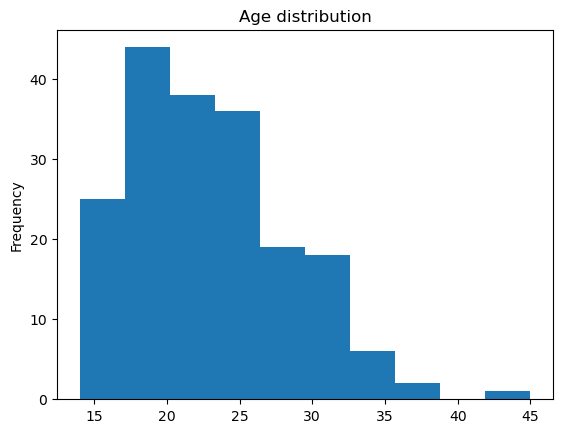

In [9]:
#Age distribution for all mothers
df.toPandas()["AGE"].plot.hist(x="AGE", title="Age distribution")

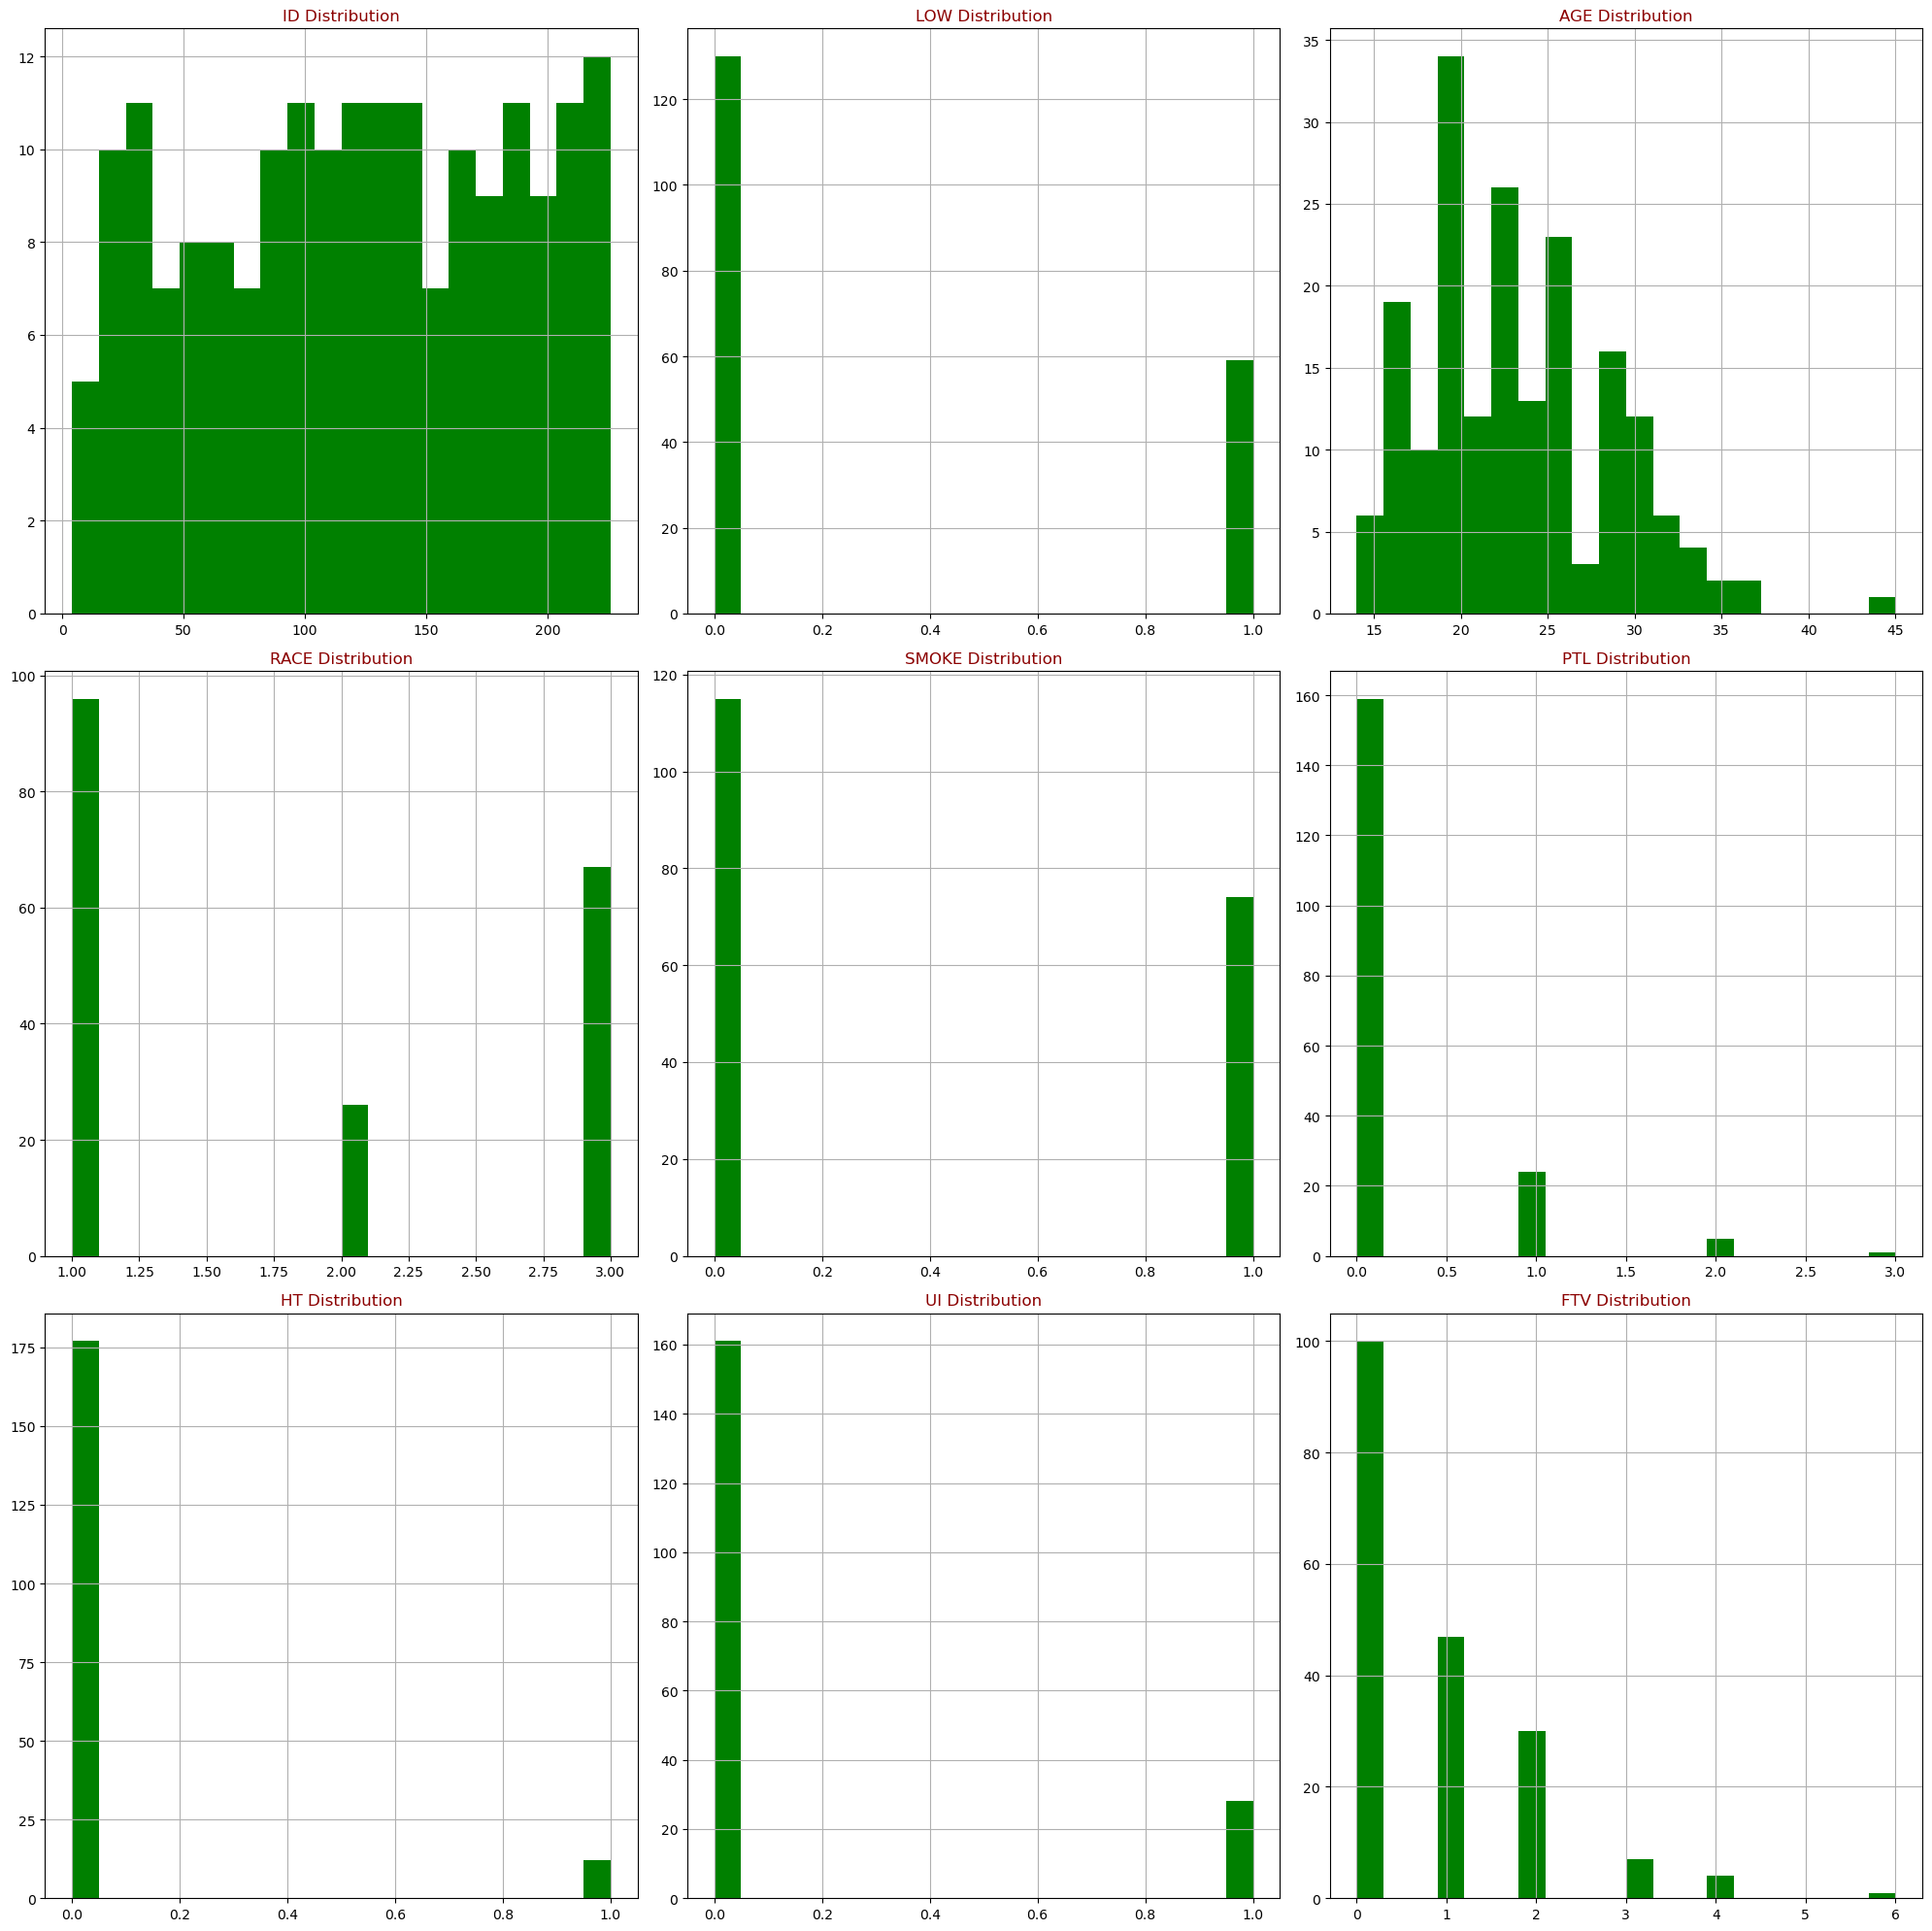

In [10]:
#Draw histogram for all variables
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='green')
        ax.set_title(feature+" Distribution",color='DarkRed')

    fig.tight_layout()
    plt.show()
draw_histograms(df_data_1.toPandas(), df_data_1.toPandas().columns,3,3)

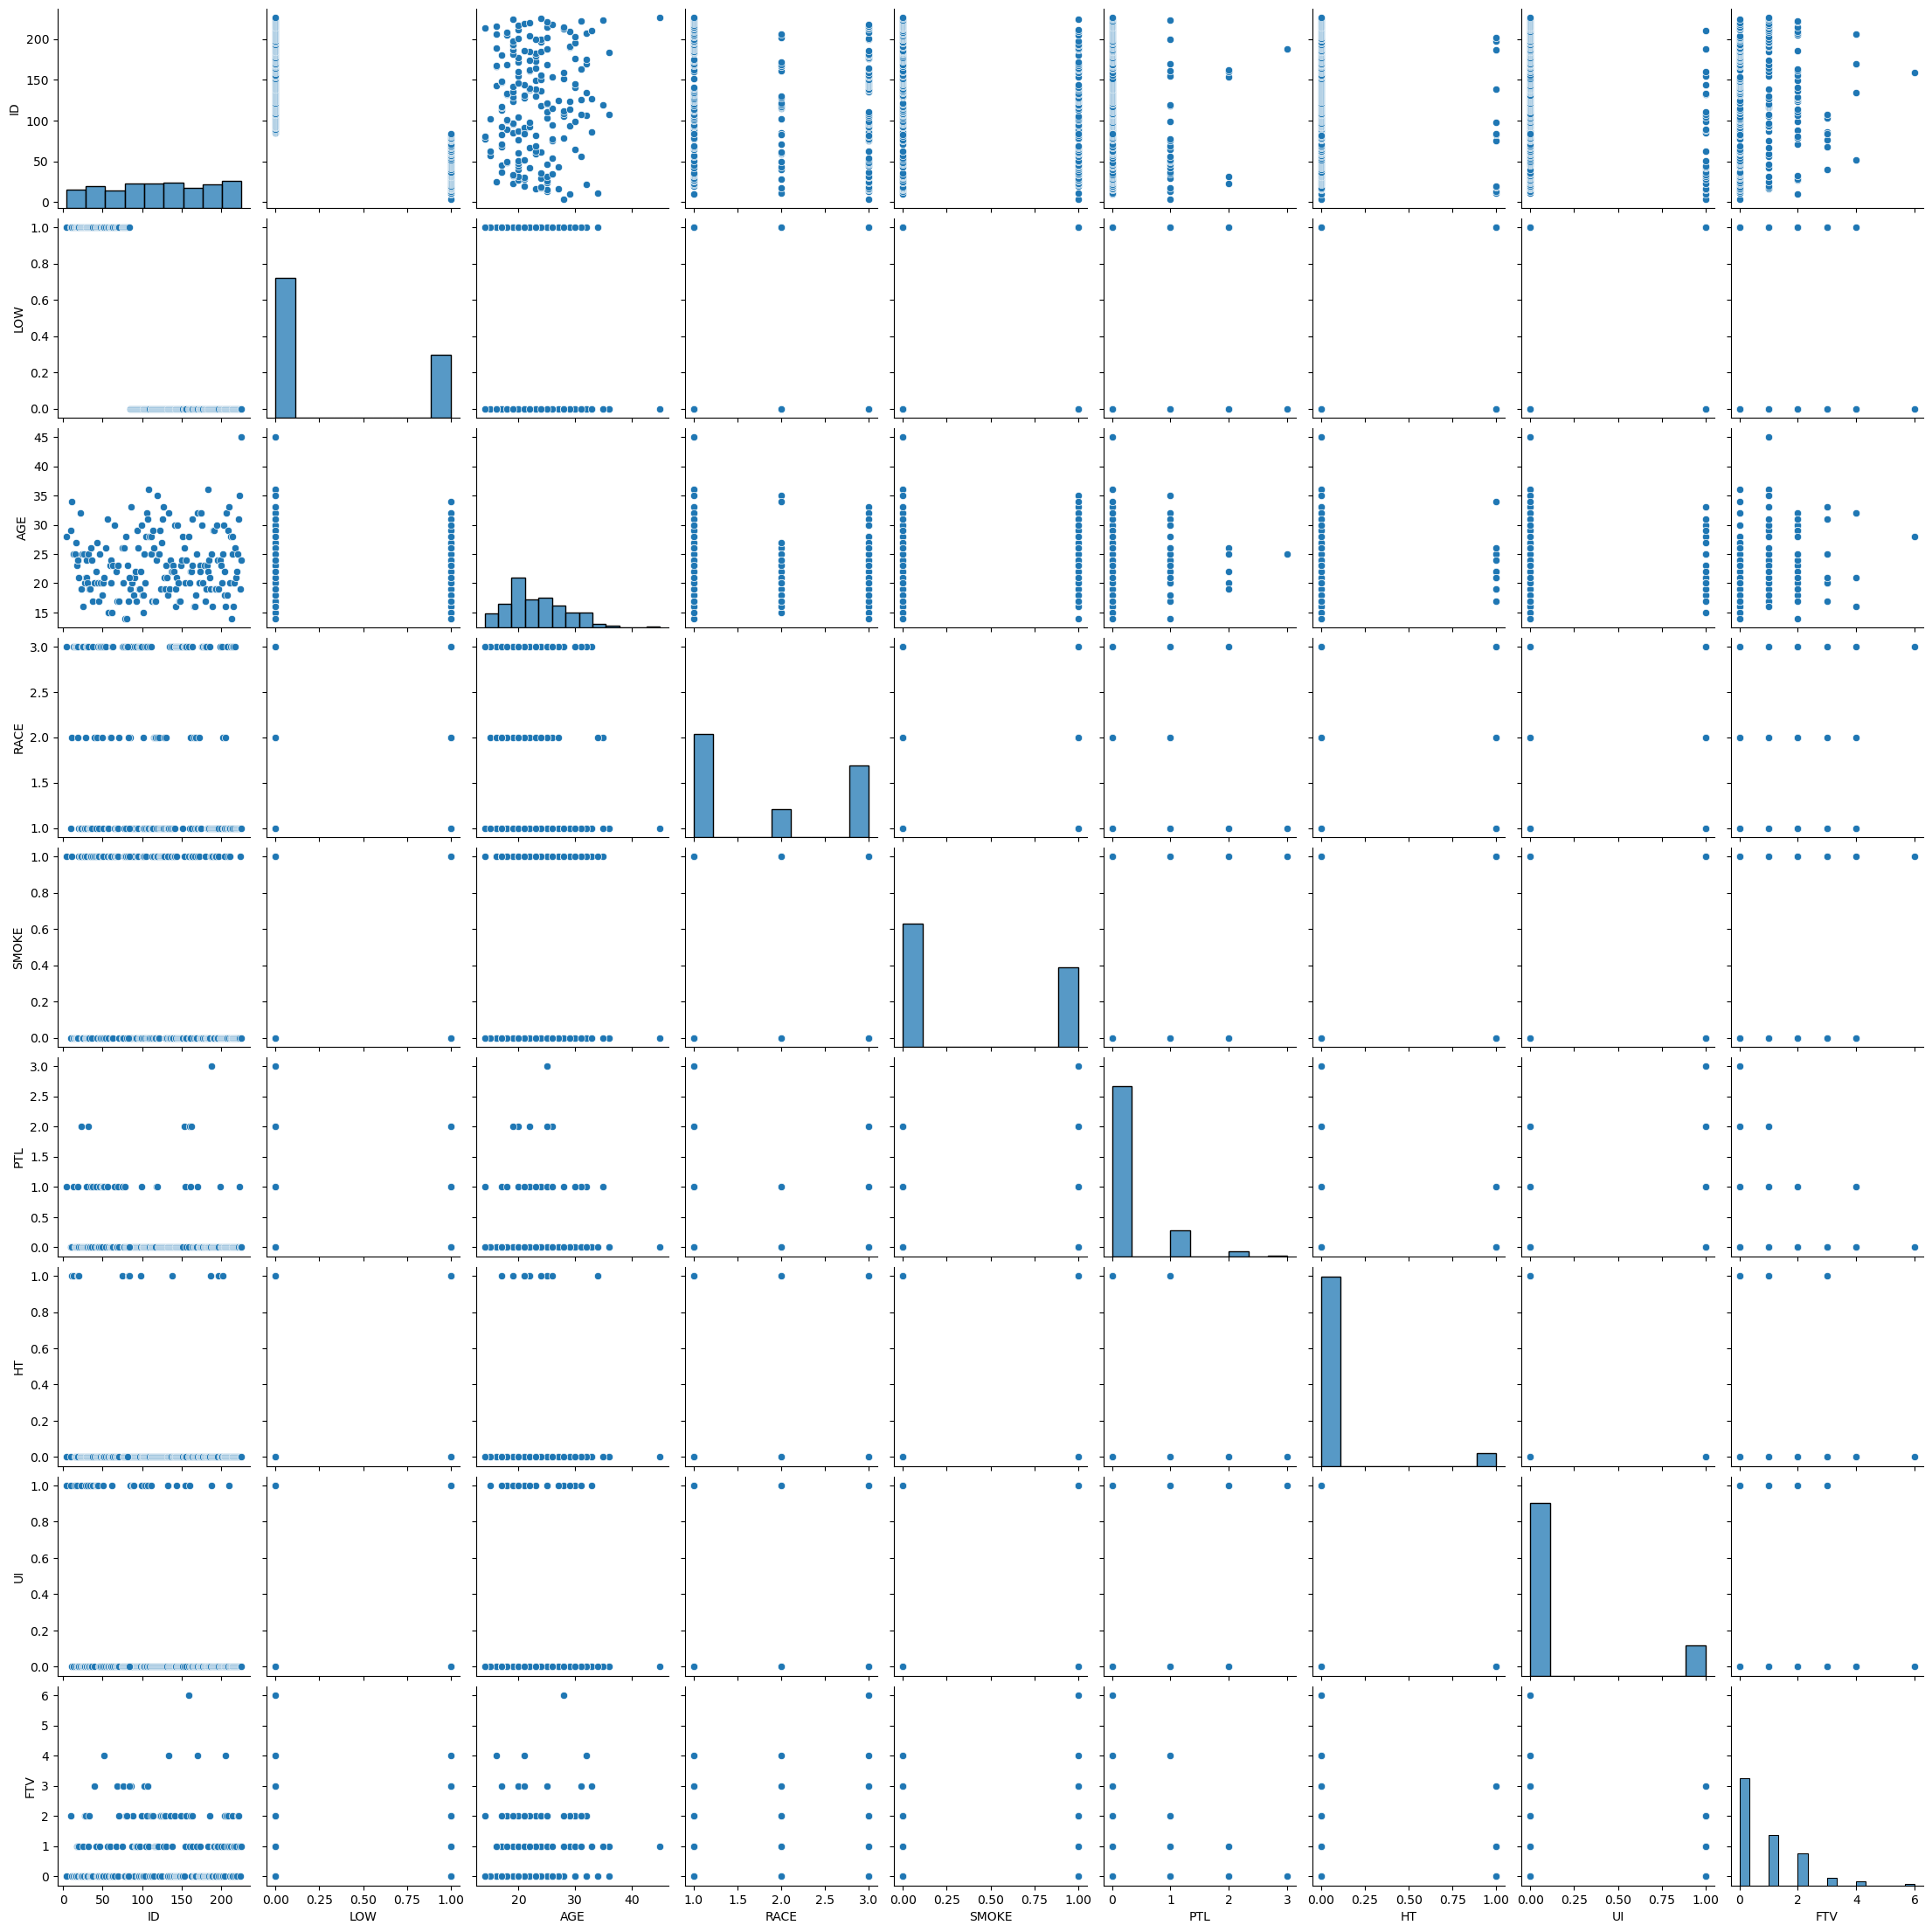

In [11]:
#Use seaborn plots
import seaborn as sn
sn.pairplot(data=df_data_1.toPandas())

<Axes: >

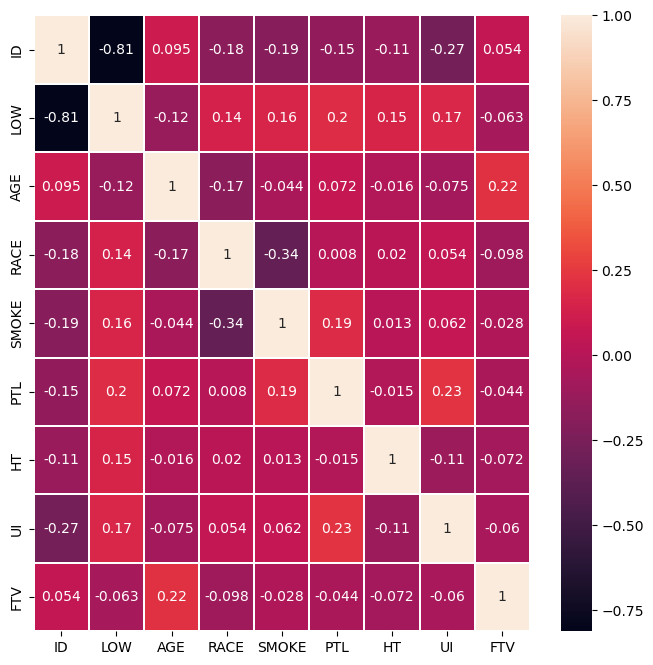

In [12]:
#Use heatmap to find possible correlations between variables
plt.figure(figsize=(8,8))
sn.heatmap(df_data_1.toPandas().corr(), annot=True, linewidths=0.1)

Spark SQL lets you query structured data, for example, data in a relational table and can be a very powerful tool for performing complex aggregations.

To create a relational table that you can query using Spark SQL and fill it with employee data, you'll use the Row class from the pyspark.sql package. You will use every line in the df_data_1 DataFrame to create a row object. Each of the row's attributes will be used to access the value of each column.

It is being used here to demonstrate how it is an option to explore the data

In [13]:
#import libraries and create needed variables
from pyspark.sql import SQLContext, Row
sqlContext = SQLContext(sc)
df_data_1.createOrReplaceTempView("ea")
sqlContext.cacheTable("ea")

/opt/ibm/spark/python/lib/pyspark.zip/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.


In [14]:
#Use SQL code to pull data from dataframe
#Looking at counts of low/non-low weights for each PTL (history of premature labor)
emplu3 = sqlContext.sql("SELECT PTL, COUNT(CASE WHEN LOW = 0 THEN 1 END) AS num_bwt_notlow, COUNT(CASE WHEN LOW = 1 THEN 1 END) AS num_bwt_low, COUNT(*) AS total_num FROM ea GROUP BY PTL ORDER BY upper(PTL)").collect()

df_emplu3 = sqlContext.createDataFrame(emplu3, ["PTL", "PTL_Babies_Notlow", "PTL_Babies_Low", "Total_Babies"])
df_emplu3.show()

+---+-----------------+--------------+------------+
|PTL|PTL_Babies_Notlow|PTL_Babies_Low|Total_Babies|
+---+-----------------+--------------+------------+
|  0|              118|            41|         159|
|  1|                8|            16|          24|
|  2|                3|             2|           5|
|  3|                1|             0|           1|
+---+-----------------+--------------+------------+



<a id="Parse"></a>
## Parse Data
Now let's load the data into a `Spark RDD` and output the number of rows and first 5 rows.
Each project you create has a bucket in your object storage. You can get the bucket name from the project Settings page. Change the string `BUCKET` to the bucket name

In [15]:
data = sc.textFile(cos.url('lowbwt.csv', 'apachesparktutorial-donotdelete-pr-pcnqnxgnxjduaw'))
print("Total records in the data set:", data.count())
print("The first 5 rows")
data.take(5)

Total records in the data set: 190
The first 5 rows


['ID,LOW,AGE,RACE,SMOKE,PTL,HT,UI,FTV',
 '85,0,19,2,0,0,0,1,0',
 '86,0,33,3,0,0,0,0,3',
 '87,0,20,1,1,0,0,0,1',
 '88,0,21,1,1,0,0,1,2']

Crate DataFrame from RDD

In [16]:
#Load the data into a dataframe, parse it using the function above
documents = data.filter(lambda s: "SMOKE" not in s).map(parseDocument)
lowbwtData = documents.toDF() # ToDataFrame
print("Number of records: " + str(lowbwtData.count()))
print("First 5 records: ")
lowbwtData.take(5)

Number of records: 189
First 5 records: 


[Row(ID='85', PersonInfo='19 2 0 0 0 1 0', label=0.0),
 Row(ID='86', PersonInfo='33 3 0 0 0 0 3', label=0.0),
 Row(ID='87', PersonInfo='20 1 1 0 0 0 1', label=0.0),
 Row(ID='88', PersonInfo='21 1 1 0 0 1 2', label=0.0),
 Row(ID='89', PersonInfo='18 1 1 0 0 1 0', label=0.0)]

In [19]:
from pyspark.sql import SparkSession, Row
from pyspark.sql.functions import col, expr
from pyspark.ml.feature import VectorAssembler

# Initialize Spark session
spark = SparkSession.builder.appName("SMOTEExample").getOrCreate()
sc = spark.sparkContext

# Load the data
data = sc.textFile(cos.url('lowbwt.csv', 'apachesparktutorial-donotdelete-pr-pcnqnxgnxjduaw'))

# Define the parseDocument function
def parseDocument(line):
    values = [str(x) for x in line.split(',')]
    if values[1] > '0':
        LOW = 1.0
    else:
        LOW = 0.0
    textValue = f"{values[2]} {values[3]} {values[4]} {values[5]} {values[6]} {values[7]} {values[8]}"
    return Row(ID=values[0], PersonInfo=textValue, label=LOW)

# Create DataFrame from RDD
documents = data.filter(lambda s: "SMOKE" not in s).map(parseDocument)
lowbwtData = documents.toDF()

# Print the number of records and first 5 records
print("Number of records: " + str(lowbwtData.count()))
print("First 5 records: ")
lowbwtData.show(5)

# Count the number of instances in each class
class_counts = lowbwtData.groupBy("label").count().collect()
class_0_count = next(row['count'] for row in class_counts if row['label'] == 0.0)
class_1_count = next(row['count'] for row in class_counts if row['label'] == 1.0)

# Determine the minority and majority classes
minority_class = 0.0 if class_0_count < class_1_count else 1.0
majority_class = 1.0 if minority_class == 0.0 else 0.0

# Calculate how many times we need to duplicate the minority class
replication_factor = int(max(class_0_count, class_1_count) / min(class_0_count, class_1_count))

# Filter the minority class
minority_df = lowbwtData.filter(col("label") == minority_class)

# Replicate the minority class DataFrame
oversampled_minority_df = minority_df.withColumn("dummy", expr(f"explode(array_repeat(struct(*), {replication_factor}))")).drop("dummy")

# Combine with the majority class DataFrame
majority_df = lowbwtData.filter(col("label") == majority_class)
resampled_df = majority_df.union(oversampled_minority_df)

# Verify the resampled data
print("Number of records after oversampling: " + str(resampled_df.count()))
print("Class distribution after oversampling: ")
resampled_df.groupBy("label").count().show()

# Rename resampled_df back to lowbwtData to continue with further analysis
lowbwtData = resampled_df


Number of records: 189
First 5 records: 
+---+--------------+-----+
| ID|    PersonInfo|label|
+---+--------------+-----+
| 85|19 2 0 0 0 1 0|  0.0|
| 86|33 3 0 0 0 0 3|  0.0|
| 87|20 1 1 0 0 0 1|  0.0|
| 88|21 1 1 0 0 1 2|  0.0|
| 89|18 1 1 0 0 1 0|  0.0|
+---+--------------+-----+
only showing top 5 rows

Number of records after oversampling: 248
Class distribution after oversampling: 
+-----+-----+
|label|count|
+-----+-----+
|  0.0|  130|
|  1.0|  118|
+-----+-----+



<a id="training_test"></a>
## Split Data into Training and Test Set

We divide the data into training and test set.  The training set is used to build the model to be used on future data, and the test set is used to evaluate the model.

In [20]:
# Divide the data into training and test set, with random seed to reproduce results
# Adjusted split to 70:30 to help with overfitting
(train, test) = lowbwtData.randomSplit([0.7, 0.3], seed = 123)
print("Number of records in the training set: " + str(train.count()))
print("Number of records in the test set: " + str(test.count()))
# Output first 20 records in the training set
print("First 20 records in the training set: ")
train.show()

Number of records in the training set: 171
Number of records in the test set: 77
First 20 records in the training set: 
+---+--------------+-----+
| ID|    PersonInfo|label|
+---+--------------+-----+
|100|18 1 1 0 0 0 0|  0.0|
|101|18 1 1 0 0 0 0|  0.0|
|103|25 1 1 0 0 0 3|  0.0|
|104|20 3 0 0 0 1 0|  0.0|
|105|28 1 1 0 0 0 1|  0.0|
|107|31 1 0 0 0 1 3|  0.0|
|108|36 1 0 0 0 0 1|  0.0|
|111|25 3 0 0 0 1 2|  0.0|
|112|28 1 0 0 0 0 0|  0.0|
|115|26 2 1 0 0 0 0|  0.0|
|116|17 2 0 0 0 0 1|  0.0|
|117|17 2 0 0 0 0 1|  0.0|
|118|24 1 1 1 0 0 1|  0.0|
|120|25 1 0 0 0 0 1|  0.0|
|121|25 2 0 0 0 0 0|  0.0|
|123|29 1 1 0 0 0 2|  0.0|
|124|19 1 1 0 0 0 2|  0.0|
|126|31 1 1 0 0 0 2|  0.0|
|127|33 1 1 0 0 0 1|  0.0|
|128|21 2 1 0 0 0 2|  0.0|
+---+--------------+-----+
only showing top 20 rows



<a id="build_model"></a>
## Build Logistic Regression Model

We use the Pipeline of SparkML to build the Logistic Regression Model

In [21]:
# set up Logistic Regression using Pipeline of SparkML
tokenizer = Tokenizer(inputCol="PersonInfo", outputCol="words")
hashingTF = HashingTF(inputCol=tokenizer.getOutputCol(), outputCol="features")
lr = LogisticRegression(maxIter=50, regParam=0.01)
pipeline = Pipeline(stages=[tokenizer, hashingTF, lr])

In [22]:
# set up Logistic Regression Model
# the stages are executed in order
model = pipeline.fit(train)
#[stage.coefficients for stage in model.stages if hasattr(stage, "coefficients")]
# model.stages[2].intercept
# model.stages[2].coefficients

<a id="test_data"></a>
## Logistic Regression Predictions for Test Data

In [23]:
# Make predictions on test documents and print columns of interest
prediction = model.transform(test)
selected = prediction.select("PersonInfo", "prediction", "probability")
for row in selected.collect():
    print(row)


Row(PersonInfo='15 2 0 0 0 0 0', prediction=1.0, probability=DenseVector([0.0729, 0.9271]))
Row(PersonInfo='32 3 0 0 0 0 2', prediction=1.0, probability=DenseVector([0.4969, 0.5031]))
Row(PersonInfo='28 3 0 0 0 0 0', prediction=0.0, probability=DenseVector([0.7865, 0.2135]))
Row(PersonInfo='17 1 1 0 0 0 0', prediction=1.0, probability=DenseVector([0.3961, 0.6039]))
Row(PersonInfo='29 1 0 0 0 0 2', prediction=0.0, probability=DenseVector([0.7674, 0.2326]))
Row(PersonInfo='35 2 1 1 0 0 1', prediction=1.0, probability=DenseVector([0.3435, 0.6565]))
Row(PersonInfo='27 1 1 0 0 0 0', prediction=1.0, probability=DenseVector([0.0323, 0.9677]))
Row(PersonInfo='21 1 0 0 0 0 0', prediction=0.0, probability=DenseVector([0.5925, 0.4075]))
Row(PersonInfo='18 1 1 0 0 1 0', prediction=0.0, probability=DenseVector([0.6297, 0.3703]))
Row(PersonInfo='19 3 0 0 0 0 0', prediction=0.0, probability=DenseVector([0.6714, 0.3286]))
Row(PersonInfo='24 1 0 0 0 0 2', prediction=0.0, probability=DenseVector([0.5153

In [24]:
#Tabulate the predicted outcome
prediction.select("prediction").groupBy("prediction").count().show(truncate=False)

+----------+-----+
|prediction|count|
+----------+-----+
|0.0       |38   |
|1.0       |39   |
+----------+-----+



In [25]:
#Tabulate the actual outcome
prediction.select("label").groupBy("label").count().show(truncate=False)

+-----+-----+
|label|count|
+-----+-----+
|0.0  |43   |
|1.0  |34   |
+-----+-----+



In [26]:
# This table shows:
# 1. The number of low birth weight babies predicted as having low birth weight: true positive
# 2. The number of low birth weight babies predicted as not having low birth weight: false negative
# 3. The number of regular birth weight babies predicted as having low birth weight: false positive
# 4. The number of regular birth weight babies predicted as not having low birth weight: true negative

prediction.crosstab('label', 'prediction').show()

+----------------+---+---+
|label_prediction|0.0|1.0|
+----------------+---+---+
|             1.0| 11| 23|
|             0.0| 27| 16|
+----------------+---+---+



<a id="evaluate_model"></a>
## Evaluate Logistic Regression Model

We evaluate the model on a training set and on a test set.  The purpose is to measure the model's predictive accuracy, including the accuracy for new data.

In [27]:
# Evaluate the Logistic Regression model on a training set
# Select (prediction, true label) and compute training error
pred_lr=model.transform(train).select("prediction", "label")
eval_lr=MulticlassClassificationEvaluator (
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy_lr=eval_lr.evaluate(pred_lr)
# create RDD
predictionAndLabels_lr=pred_lr.rdd
metrics_lr=MulticlassMetrics(predictionAndLabels_lr)
precision_lr=metrics_lr.precision(1.0)
recall_lr=metrics_lr.recall(1.0)
f1Measure_lr = metrics_lr.fMeasure(1.0, 1.0)
print("F1 Measure = %s" % f1Measure_lr)
print ("Training Accuracy = %s" %accuracy_lr)
print ("Training Error = %s" % (1-accuracy_lr))
print ("Precision = %s" %precision_lr)
print ("Recall = %s" %recall_lr)

/opt/ibm/spark/python/lib/pyspark.zip/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.


F1 Measure = 0.7065868263473053
Training Accuracy = 0.7134502923976608
Training Error = 0.2865497076023392
Precision = 0.7108433734939759
Recall = 0.7023809523809523


In [28]:
# Evaluate the Logistic Regression model on a test set
# Select (prediction, true label) and compute test error
pred_lr=model.transform(test).select("prediction", "label")
eval_lr=MulticlassClassificationEvaluator (
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy_lr=eval_lr.evaluate(pred_lr)
# create RDD
predictionAndLabels_lr=pred_lr.rdd
metrics_lr=MulticlassMetrics(predictionAndLabels_lr)
precision_lr=metrics_lr.precision(1.0)
recall_lr=metrics_lr.recall(1.0)
f1Measure_lr = metrics_lr.fMeasure(1.0, 1.0)
print("F1 Measure = %s" % f1Measure_lr)
print ("Test Accuracy = %s" %accuracy_lr)
print ("Test Error = %s" % (1-accuracy_lr))
print ("Precision = %s" %precision_lr)
print ("Recall = %s" %recall_lr)

F1 Measure = 0.6301369863013699
Test Accuracy = 0.6493506493506493
Test Error = 0.35064935064935066
Precision = 0.5897435897435898
Recall = 0.6764705882352942


In [29]:
bin_lr=BinaryClassificationMetrics(predictionAndLabels_lr)

# Area under precision-recall curve
print("Area under PR = %s" % bin_lr.areaUnderPR)
# Area under Receiver operating characteristic curve
print("Area under ROC = %s" % bin_lr.areaUnderROC)

Area under PR = 0.5657724628312863
Area under ROC = 0.6521887824897401


<a id="ROC_plot"></a>
## ROC Curve Plot
The Binary Logistic Regression method returns the pyspark.ml.classification.BinaryLogisticRegressionTrainingSummary object. We may use the roc method to obtain the coordinates of the points on Receiver operating characteristic (ROC) curve.  The coordinates are stored in a Dataframe with two fields FPR=false positive rate and TPR=true positive rate

In [30]:
#The firt 20 ROC curve points
model.stages[2].summary.roc.show()

+--------------------+--------------------+
|                 FPR|                 TPR|
+--------------------+--------------------+
|                 0.0|                 0.0|
|                 0.0|0.011904761904761904|
|                 0.0| 0.03571428571428571|
|                 0.0|0.047619047619047616|
|                 0.0| 0.07142857142857142|
|                 0.0| 0.09523809523809523|
|                 0.0| 0.11904761904761904|
|                 0.0| 0.13095238095238096|
|                 0.0| 0.14285714285714285|
|                 0.0| 0.15476190476190477|
|                 0.0| 0.16666666666666666|
|0.011494252873563218| 0.16666666666666666|
|0.011494252873563218| 0.17857142857142858|
|0.022988505747126436| 0.17857142857142858|
|0.034482758620689655| 0.17857142857142858|
| 0.04597701149425287| 0.17857142857142858|
| 0.05747126436781609| 0.17857142857142858|
| 0.06896551724137931| 0.17857142857142858|
| 0.06896551724137931| 0.20238095238095238|
| 0.06896551724137931| 0.2142857

<Axes: xlabel='FPR'>

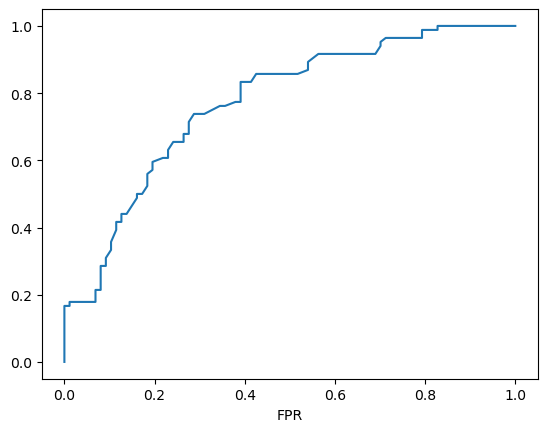

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
ROC=model.stages[2].summary.roc
df=ROC.toPandas()

df.plot(x='FPR', y='TPR', legend=False)

<a id="build_model_2"></a>
## Build Naive Bayes Model

We use the Pipeline of SparkML to build the Naive Bayes Model

In [32]:
# set up Naive Bayes using Pipeline of SparkML
tokenizer = Tokenizer(inputCol="PersonInfo", outputCol="words")
hashingTF = HashingTF(inputCol=tokenizer.getOutputCol(), outputCol="features", numFeatures=32)
nb = NaiveBayes(labelCol="label", featuresCol="features", predictionCol="prediction", smoothing=1.0, modelType="multinomial")
pipeline = Pipeline(stages=[tokenizer, hashingTF, nb])

In [33]:
# set up Naive Bayes Model
# the stages are executed in order
model = pipeline.fit(train)

<a id="test_data_2"></a>
## Naive Bayes Predictions for Test Data

In [34]:
# Make predictions on test documents and print columns of interest
prediction = model.transform(test)
selected = prediction.select("PersonInfo", "prediction", "probability")
for row in selected.collect():
    print(row)
#for row in prediction.collect():
#    print row

Row(PersonInfo='15 2 0 0 0 0 0', prediction=1.0, probability=DenseVector([0.4969, 0.5031]))
Row(PersonInfo='32 3 0 0 0 0 2', prediction=0.0, probability=DenseVector([0.5356, 0.4644]))
Row(PersonInfo='28 3 0 0 0 0 0', prediction=0.0, probability=DenseVector([0.6983, 0.3017]))
Row(PersonInfo='17 1 1 0 0 0 0', prediction=1.0, probability=DenseVector([0.4275, 0.5725]))
Row(PersonInfo='29 1 0 0 0 0 2', prediction=0.0, probability=DenseVector([0.5157, 0.4843]))
Row(PersonInfo='35 2 1 1 0 0 1', prediction=1.0, probability=DenseVector([0.382, 0.618]))
Row(PersonInfo='27 1 1 0 0 0 0', prediction=1.0, probability=DenseVector([0.1929, 0.8071]))
Row(PersonInfo='21 1 0 0 0 0 0', prediction=0.0, probability=DenseVector([0.518, 0.482]))
Row(PersonInfo='18 1 1 0 0 1 0', prediction=0.0, probability=DenseVector([0.6146, 0.3854]))
Row(PersonInfo='19 3 0 0 0 0 0', prediction=0.0, probability=DenseVector([0.5863, 0.4137]))
Row(PersonInfo='24 1 0 0 0 0 2', prediction=1.0, probability=DenseVector([0.4768, 0.

In [35]:
#Tabulate the predicted outcome
prediction.select("prediction").groupBy("prediction").count().show(truncate=False)

+----------+-----+
|prediction|count|
+----------+-----+
|0.0       |31   |
|1.0       |46   |
+----------+-----+



In [36]:
#Tabulate the actual outcome
prediction.select("label").groupBy("label").count().show(truncate=False)

+-----+-----+
|label|count|
+-----+-----+
|0.0  |43   |
|1.0  |34   |
+-----+-----+



In [37]:
# This table shows:
# 1. The number of low birth weight babies predicted as having low birth weight: true positive
# 2. The number of low birth weight babies predicted as not having low birth weight: false negative
# 3. The number of regular birth weight babies predicted as having low birth weight: false positive
# 4. The number of regular birth weight babies predicted as not having low birth weight: true negative

prediction.crosstab('label', 'prediction').show()

+----------------+---+---+
|label_prediction|0.0|1.0|
+----------------+---+---+
|             1.0| 10| 24|
|             0.0| 21| 22|
+----------------+---+---+



<a id="evaluate_model_2"></a>
## Evaluate Naive Bayes Model

We evaluate the model on a training set and on a test set.  The purpose is to measure the model's predictive accuracy, including the accuracy for new data.

In [38]:
# Evaluate the Naive Bayes model on a training set
# Select (prediction, true label) and compute training error
pred_nb=model.transform(train).select("prediction", "label")
eval_nb=MulticlassClassificationEvaluator (
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy_nb=eval_nb.evaluate(pred_nb)
# create RDD
predictionAndLabels_nb=pred_nb.rdd
metrics_nb=MulticlassMetrics(predictionAndLabels_nb)
precision_nb=metrics_nb.precision(1.0)
recall_nb=metrics_nb.recall(1.0)
f1Measure_nb = metrics_nb.fMeasure(1.0, 1.0)
print("F1 Measure = %s" % f1Measure_nb)
print ("Training Accuracy = %s" %accuracy_nb)
print ("Training Error = %s" % (1-accuracy_nb))
print ("Precision = %s" %precision_nb)
print ("Recall = %s" %recall_nb)

/opt/ibm/spark/python/lib/pyspark.zip/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.


F1 Measure = 0.6480446927374303
Training Accuracy = 0.631578947368421
Training Error = 0.368421052631579
Precision = 0.6105263157894737
Recall = 0.6904761904761905


In [39]:
# Evaluate the Naive Bayes model on a test set
# Select (prediction, true label) and compute test error
pred_nb=model.transform(test).select("prediction", "label")
eval_nb=MulticlassClassificationEvaluator (
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy_nb=eval_nb.evaluate(pred_nb)
# create RDD
predictionAndLabels_nb=pred_nb.rdd
metrics_nb=MulticlassMetrics(predictionAndLabels_nb)
precision_nb=metrics_nb.precision(1.0)
recall_nb=metrics_nb.recall(1.0)
f1Measure_nb = metrics_nb.fMeasure(1.0, 1.0)
print("F1 Measure = %s" % f1Measure_nb)
print ("Test Accuracy = %s" %accuracy_nb)
print ("Test Error = %s" % (1-accuracy_nb))
print ("Precision = %s" %precision_nb)
print ("Recall = %s" %recall_nb)

F1 Measure = 0.6
Test Accuracy = 0.5844155844155844
Test Error = 0.4155844155844156
Precision = 0.5217391304347826
Recall = 0.7058823529411765


In [40]:
bin_nb=BinaryClassificationMetrics(predictionAndLabels_nb)

# Area under precision-recall curve
print("Area under PR = %s" % bin_nb.areaUnderPR)
# Area under Receiver operating characteristic curve
print("Area under ROC = %s" % bin_nb.areaUnderROC)

Area under PR = 0.5099478526588501
Area under ROC = 0.5971272229822162


<a id="build_model_3"></a>
## Build Decision Tree Model

We use the Pipeline of SparkML to build the Decision Tree Model

In [41]:
# set up Decision Tree using Pipeline of SparkML
tokenizer = Tokenizer(inputCol="PersonInfo", outputCol="words")
hashingTF = HashingTF(inputCol=tokenizer.getOutputCol(), outputCol="features", numFeatures=32)
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")
pipeline = Pipeline(stages=[tokenizer, hashingTF, dt])

In [42]:
# set up Decision Tree Model
# the stages are executed in order
model = pipeline.fit(train)

<a id="test_data_3"></a>
## Decision Tree Predictions for Test Data

In [43]:
# Make predictions on test documents and print columns of interest
prediction = model.transform(test)
selected = prediction.select("PersonInfo", "prediction", "probability")
for row in selected.collect():
    print(row)
#for row in prediction.collect():
#    print row

Row(PersonInfo='15 2 0 0 0 0 0', prediction=0.0, probability=DenseVector([0.6753, 0.3247]))
Row(PersonInfo='32 3 0 0 0 0 2', prediction=1.0, probability=DenseVector([0.3906, 0.6094]))
Row(PersonInfo='28 3 0 0 0 0 0', prediction=1.0, probability=DenseVector([0.3906, 0.6094]))
Row(PersonInfo='17 1 1 0 0 0 0', prediction=0.0, probability=DenseVector([0.6753, 0.3247]))
Row(PersonInfo='29 1 0 0 0 0 2', prediction=0.0, probability=DenseVector([0.6753, 0.3247]))
Row(PersonInfo='35 2 1 1 0 0 1', prediction=0.0, probability=DenseVector([0.6753, 0.3247]))
Row(PersonInfo='27 1 1 0 0 0 0', prediction=1.0, probability=DenseVector([0.0, 1.0]))
Row(PersonInfo='21 1 0 0 0 0 0', prediction=0.0, probability=DenseVector([0.6753, 0.3247]))
Row(PersonInfo='18 1 1 0 0 1 0', prediction=0.0, probability=DenseVector([0.6753, 0.3247]))
Row(PersonInfo='19 3 0 0 0 0 0', prediction=0.0, probability=DenseVector([1.0, 0.0]))
Row(PersonInfo='24 1 0 0 0 0 2', prediction=1.0, probability=DenseVector([0.25, 0.75]))
Row(

In [44]:
#Tabulate the predicted outcome
prediction.select("prediction").groupBy("prediction").count().show(truncate=False)

+----------+-----+
|prediction|count|
+----------+-----+
|0.0       |42   |
|1.0       |35   |
+----------+-----+



In [45]:
#Tabulate the actual outcome
prediction.select("label").groupBy("label").count().show(truncate=False)

+-----+-----+
|label|count|
+-----+-----+
|0.0  |43   |
|1.0  |34   |
+-----+-----+



In [46]:
# This table shows:
# 1. The number of low birth weight babies predicted as having low birth weight: true positive
# 2. The number of low birth weight babies predicted as not having low birth weight: false negative
# 3. The number of regular birth weight babies predicted as having low birth weight: false positive
# 4. The number of regular birth weight babies predicted as not having low birth weight: true negative

prediction.crosstab('label', 'prediction').show()

+----------------+---+---+
|label_prediction|0.0|1.0|
+----------------+---+---+
|             1.0| 15| 19|
|             0.0| 27| 16|
+----------------+---+---+



<a id="evaluate_model_3"></a>
## Evaluate Decision Tree Model

We evaluate the model on a training set and on a test set.  The purpose is to measure the model's predictive accuracy, including the accuracy for new data.

In [47]:
# Evaluate the Decision Tree model on a training set
# Select (prediction, true label) and compute training error
pred_nb=model.transform(train).select("prediction", "label")
eval_nb=MulticlassClassificationEvaluator (
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy_nb=eval_nb.evaluate(pred_nb)
# create RDD
predictionAndLabels_nb=pred_nb.rdd
metrics_nb=MulticlassMetrics(predictionAndLabels_nb)
precision_nb=metrics_nb.precision(1.0)
recall_nb=metrics_nb.recall(1.0)
f1Measure_nb = metrics_nb.fMeasure(1.0, 1.0)
print("F1 Measure = %s" % f1Measure_nb)
print ("Training Accuracy = %s" %accuracy_nb)
print ("Training Error = %s" % (1-accuracy_nb))
print ("Precision = %s" %precision_nb)
print ("Recall = %s" %recall_nb)

F1 Measure = 0.6900584795321637
Training Accuracy = 0.6900584795321637
Training Error = 0.3099415204678363
Precision = 0.6781609195402298
Recall = 0.7023809523809523


In [48]:
# Evaluate the Decision Tree model on a test set
# Select (prediction, true label) and compute test error
pred_nb=model.transform(test).select("prediction", "label")
eval_nb=MulticlassClassificationEvaluator (
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy_nb=eval_nb.evaluate(pred_nb)
# create RDD
predictionAndLabels_nb=pred_nb.rdd
metrics_nb=MulticlassMetrics(predictionAndLabels_nb)
precision_nb=metrics_nb.precision(1.0)
recall_nb=metrics_nb.recall(1.0)
f1Measure_nb = metrics_nb.fMeasure(1.0, 1.0)
print("F1 Measure = %s" % f1Measure_nb)
print ("Test Accuracy = %s" %accuracy_nb)
print ("Test Error = %s" % (1-accuracy_nb))
print ("Precision = %s" %precision_nb)
print ("Recall = %s" %recall_nb)

F1 Measure = 0.5507246376811593
Test Accuracy = 0.5974025974025974
Test Error = 0.4025974025974026
Precision = 0.5428571428571428
Recall = 0.5588235294117647


In [49]:
bin_nb=BinaryClassificationMetrics(predictionAndLabels_nb)

# Area under precision-recall curve
print("Area under PR = %s" % bin_nb.areaUnderPR)
# Area under Receiver operating characteristic curve
print("Area under ROC = %s" % bin_nb.areaUnderROC)

Area under PR = 0.5205118411000764
Area under ROC = 0.5933652530779754
